In [37]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

from utils import get_data, get_X_show, get_metrics, get_post

In [38]:
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
d_x_overfit = 20
n_train = 5
n_test = 10000
X_train, X_train_overfit, Y_train, X_train_orig = get_data(
    d_x=d_x, d_x_overfit=d_x_overfit, n_data=n_train
)
X_train_aug, _, Y_train_aug, _ = get_data(
    d_x=d_x, d_x_overfit=d_x_overfit, n_data=n_train, x_start=100.0
)
X_test, X_test_overfit, Y_test, X_test_orig = get_data(
    d_x=d_x, d_x_overfit=d_x_overfit, n_data=n_test
)
X_show, X_show_model, X_show_orig = get_X_show(d_x=d_x, d_x_overfit=d_x_overfit)
Y_true = torch.sum(X_show, 1)

# fit

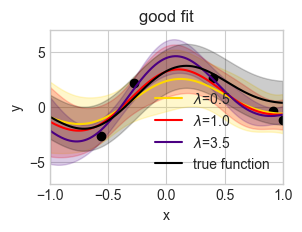

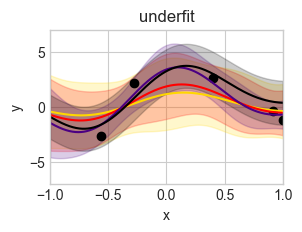

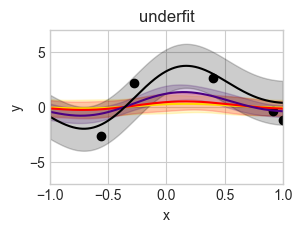

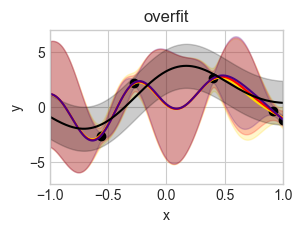

In [39]:
settings = [
    "perfect",
    "model_bad",
    "prior_bad",
    # "data_augmentation",
    "overfit",
]

for setting in settings:
    if setting == "perfect":
        var_likelihood = 1.0
        var_prior = 2.0
    if setting == "model_bad":
        var_likelihood = 3.0
        var_prior = 2.0
    if setting == "prior_bad":
        var_likelihood = 1.0
        var_prior = 0.1
    if setting == "data_augmentation":
        var_likelihood = 1.0
        var_prior = 2.0
    if setting == "overfit":
        var_likelihood = 0.15
        var_prior = 2.0

    dir_prefix = f"./cpe_underfit/{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    true_label = "true function"
    # data_label = "training data"

    # model fit
    plt.figure(figsize=(3, 2))
    for lamb in [0.5, 1.0, 3.5]:

        # get posterior predictive mean and variance
        if setting == "data_augmentation":
            m_N, S_N, _ = get_post(
                X_train_aug, Y_train_aug, var_prior, var_likelihood, lamb
            )
        elif setting == "overfit":
            m_N, S_N, _ = get_post(
                X_train_overfit, Y_train, var_prior, var_likelihood, lamb
            )
        else:
            m_N, S_N, _ = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)

        if setting == "overfit":
            post_pred_mean = X_show_model @ m_N
            post_pred_var = torch.diag(X_show_model @ S_N @ X_show_model.T)
        else:
            post_pred_mean = X_show @ m_N
            post_pred_var = torch.diag(X_show @ S_N @ X_show.T)

        lamb_label = r"$\lambda$" + f"={lamb}"

        if lamb == 0.5:
            c="gold"
        elif lamb == 1.0:
            c="red"
        elif lamb==3.5:
            c="indigo"
        plt.plot(X_show_orig, post_pred_mean, label=lamb_label, color=c)
        plt.fill_between(
            X_show_orig,
            post_pred_mean + 2 * torch.sqrt(post_pred_var),
            post_pred_mean - 2 * torch.sqrt(post_pred_var),
            alpha=0.2,
            color=c
        )

    plt.plot(X_show_orig, Y_true, label=true_label, color="black")
    plt.fill_between(
        X_show_orig, Y_true + 2 * 1.0, Y_true - 2 * 1.0, alpha=0.2, color="black",
    )
    # plt.scatter(X_train_orig, Y_train, label=data_label, marker="o", color="black")
    plt.scatter(X_train_orig, Y_train, marker="o", color="black")

    if setting == "perfect":
        plt.legend(loc='lower right')
        plt.title("good fit")
    elif setting == "overfit":
        plt.title("overfit")
    else:
        plt.title("underfit")
    plt.ylim(-7,7)
    plt.xlim(-1,1)

    plt.xlabel("x")
    plt.ylabel("y")

    plt.savefig(f"{dir_prefix}/fit_{setting}.png", dpi=1000, bbox_inches='tight')
    plt.show()

# metrics

0.5
1.0


/Users/nsq277/Desktop/cpe-blm/utils.py:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_prior = torch.tensor(var_prior)
/Users/nsq277/Desktop/cpe-blm/utils.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var_likelihood = torch.tensor(var_likelihood)


1.5
2.0
2.5
3.0
3.5


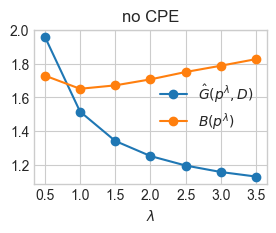

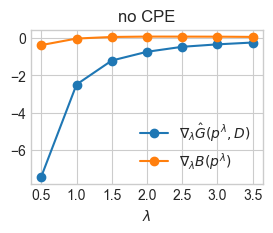

0.5
1.0
1.5
2.0
2.5
3.0
3.5


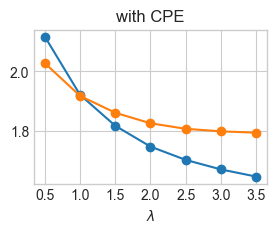

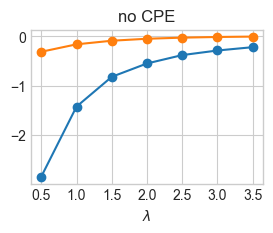

0.5
1.0
1.5
2.0
2.5
3.0
3.5


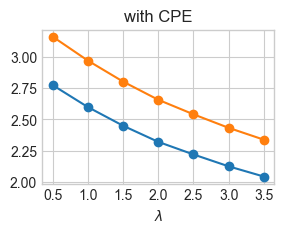

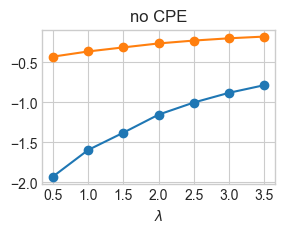

0.5
1.0
1.5
2.0
2.5
3.0
3.5


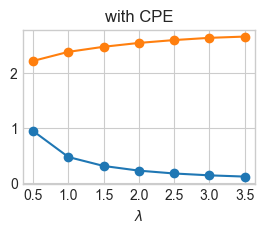

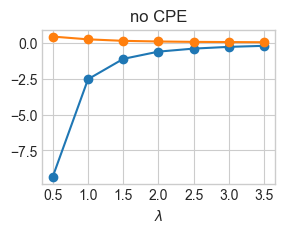

In [40]:
for setting in settings:
    if setting == "perfect":
        var_likelihood = 1.0
        var_prior = 2.0
    if setting == "model_bad":
        var_likelihood = 3.0
        var_prior = 2.0
    if setting == "prior_bad":
        var_likelihood = 1.0
        var_prior = 0.1
    if setting == "data_augmentation":
        var_likelihood = 1.0
        var_prior = 2.0
    if setting == "overfit":
        var_likelihood = 0.15
        var_prior = 2.0

    dir_prefix = f"./cpe_underfit/{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    lambs = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

    if setting == "data_augmentation":
        result = get_metrics(
            X_train_aug,
            Y_train_aug,
            X_test,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )
    elif setting == "overfit":
        result = get_metrics(
            X_train_overfit,
            Y_train,
            X_test_overfit,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )
    else:
        result = get_metrics(
            X_train,
            Y_train,
            X_test,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )

    # nll
    plt.figure(figsize=(3, 2))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_gibbs_train"],
        marker="o",
        label=r"$\hat G(p^\lambda,D)$",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_bayes_test"],
        marker="o",
        label=r"$B(p^\lambda)$",
    )

    if setting == "perfect":
        plt.legend()

    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")

    if setting=="perfect" or "overfit":
        plt.title("no CPE")
    else:
        plt.title("with CPE")    
    # plt.ylabel("nll")

    plt.savefig(f"{dir_prefix}/nll_{setting}.png", dpi=1000, bbox_inches="tight")
    plt.show()

    # grad
    plt.figure(figsize=(3, 2))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_empirical_gibbs"],
        marker="o",
        label=r"$\nabla_\lambda \hat G(p^\lambda,D)$",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_expected_bayes"],
        marker="o",
        label=r"$\nabla_\lambda B(p^\lambda)$",
    )
    if setting == "perfect":
        plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")
    # plt.ylabel("gradient")

    if setting=="perfect" or "overfit":
        plt.title("no CPE")
    else:
        plt.title("with CPE") 
        
    plt.savefig(f"{dir_prefix}/grad_{setting}.png", dpi=1000, bbox_inches="tight")
    plt.show()